In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn import *

In [2]:
from sklearn.neighbors import KNeighborsRegressor

database = sl.datasets.load_boston()
data, target = database["data"], database["target"]
data = sl.preprocessing.scale(data)
kf = sl.model_selection.KFold(n_splits = 5, shuffle = True, random_state = 42)
quality = {}
for p in np.linspace(1,10,num=200):
    model = KNeighborsRegressor(weights="distance", p=p)
    quality[p] = sl.model_selection.cross_val_score(model, X = data, y = target, scoring = "neg_mean_squared_error", cv = kf).mean()

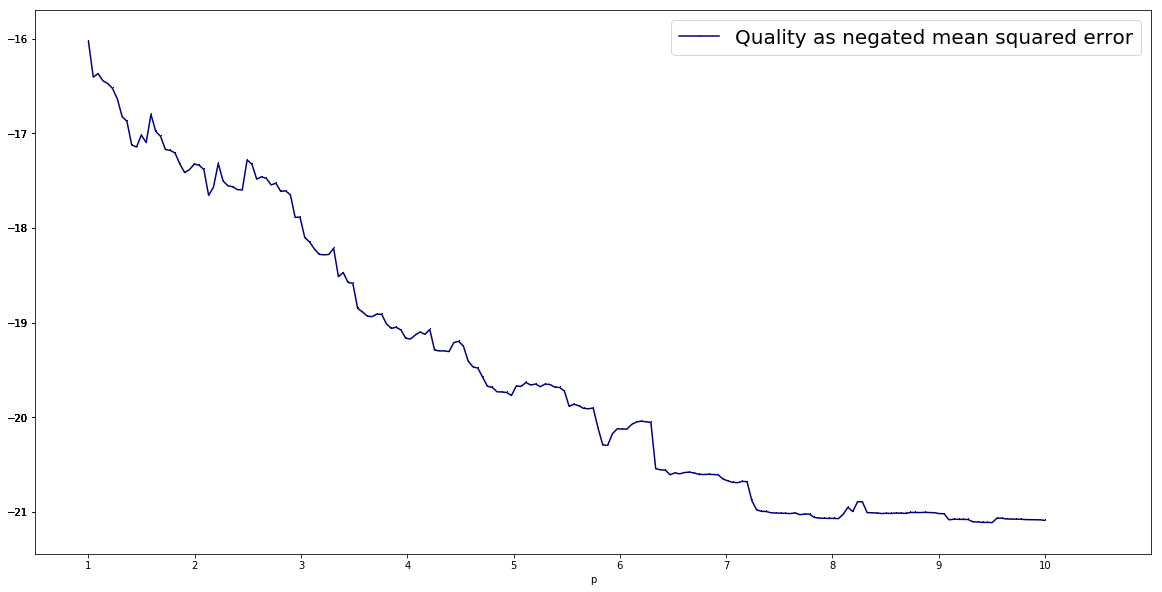

In [11]:
max(quality, key = quality.get)
plt.figure(figsize=(20,10))
plt.yticks(np.round(np.arange(min(quality.values()), max(quality.values()), 0.25),decimals=0))
plt.xticks(np.arange(1,11,1))
plt.ylim((min(quality.values()) - 0.33, max(quality.values()) + 0.33 ))
plt.xlim((0.5,11))
# print(max(quality))
plt.axhline(y=max(quality), xmin=0,xmax=1)
plt.xlabel("p")
plt.plot(list(quality.keys()), list(quality.values()), color="navy", marker=",", label="Quality as negated mean squared error")
plt.legend(loc="upper right", fontsize=20)
plt.show()